GRU

In [3]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


Importar librerías necesarias

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cargamos los datasets más relevantes (6 datasets) para trabajar con ellos: tiempos de vuelta, clasificación, resultados de carreras, pilotos, carreras y pit_stops

In [5]:
tiempos = pd.read_csv("/content/drive/MyDrive/Datasets/lap_times.csv")
clasificacion = pd.read_csv("/content/drive/MyDrive/Datasets/qualifying.csv")
resultados = pd.read_csv("/content/drive/MyDrive/Datasets/results.csv")
pilotos = pd.read_csv("/content/drive/MyDrive/Datasets/drivers.csv")
carreras = pd.read_csv("/content/drive/MyDrive/Datasets/races.csv")
pit_stops = pd.read_csv("/content/drive/MyDrive/Datasets/pit_stops.csv")

Función de tiempo para convertir los tiempos de vuelta y clasificación en segundos

In [6]:
# Función para convertir tiempos a segundos
def tiempo_a_segundos(tiempo):
    try:
        if isinstance(tiempo, str) and ':' in tiempo:
            minutos, segundos = tiempo.split(':')
            return int(minutos) * 60 + float(segundos)
        elif tiempo is not None:
            return float(tiempo)
    except ValueError:
        return np.nan  # Manejar cualquier valor no convertible con NaN

Manipulación de dataframes

Selecionamos solo columnas relevantes del dataframe races y obtendremos solo datos desde el 2019 en adelante

In [7]:
# Preparar y filtrar los datos
carreras = carreras[["raceId", "year", "round"]]
carreras = carreras[carreras["year"] >= 2019]

# Nos aseguramos que no hayan duplicados en las carreras
carreras.drop_duplicates(inplace=True)

carreras.head()

,raceId,year,round
997,1010,2019,1
998,1011,2019,2
999,1012,2019,3
1000,1013,2019,4
1001,1014,2019,5


Seleccionamos solo la información de los pilotos escogidos (11 pilotos) e eliminamos las columnas innecesarias

In [8]:
#Pilotos seleccionados
pilotos_seleccionados = ['Hamilton', 'Ricciardo', 'Bottas', 'Pérez', 'Verstappen', 'Sainz', 'Leclerc', 'Gasly', 'Norris', 'Stroll', 'Russell']

# Eliminar columnas innecesarias
pilotos = pilotos[['driverId', 'surname']]

pilotos = pilotos[pilotos['surname'].isin(pilotos_seleccionados)]

pilotos.drop_duplicates(inplace=True)

pilotos.head()

,driverId,surname
0,1,Hamilton
49,50,Verstappen
452,842,Gasly
708,708,Hamilton
814,815,Pérez


Vamos a seleccionar los datos más importantes de los resultados de las carreras


In [9]:
resultados = resultados[['raceId', 'driverId', 'grid', 'positionOrder']]

resultados.drop_duplicates(inplace=True)

resultados.head()

<ipython-input-9-06e4420f79a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados.drop_duplicates(inplace=True)


,raceId,driverId,grid,positionOrder
0,18,1,1,1
1,18,2,5,2
2,18,3,7,3
3,18,4,11,4
4,18,5,3,5


Modificamos el dataframe de lap times para quedarnos solo con los datos relevantes

In [10]:
#eliminamos la position y milisegundos del dataframe
tiempos = tiempos.drop(['position', 'milliseconds'],axis = 1)

tiempos.drop_duplicates(inplace=True)

tiempos.head()

,raceId,driverId,lap,time
0,841,20,1,1:38.109
1,841,20,2,1:33.006
2,841,20,3,1:32.713
3,841,20,4,1:32.803
4,841,20,5,1:32.342


Manipulamos el dataframe de clasificacion para eliminar columnas innecesarias

In [11]:
#eliminamos constructorId y number del dataframe
clasificacion = clasificacion.drop(['constructorId', 'number'],axis = 1)

clasificacion.drop_duplicates(inplace=True)

clasificacion.head()

,qualifyId,raceId,driverId,position,q1,q2,q3
0,1,18,1,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,1:26.103,1:25.315,1:26.869
2,3,18,5,3,1:25.664,1:25.452,1:27.079
3,4,18,13,4,1:25.994,1:25.691,1:27.178
4,5,18,2,5,1:25.960,1:25.518,1:27.236


Modificamos el dataframe de paradas en boxes para quedarnos solo con los datos relevantes

In [12]:
# Información de paradas en boxes
pit_stops = pit_stops[['raceId', 'driverId', 'stop']]

#Encontrar el numero total de paradas de cada piloto en cada carrera
pit_stops = pit_stops.groupby(['raceId', 'driverId']).max().reset_index()

pit_stops.drop_duplicates(inplace=True)

pit_stops.head()

,raceId,driverId,stop
0,841,1,2
1,841,2,2
2,841,3,1
3,841,4,3
4,841,5,1


Unimos todos los dataframes en uno solo

In [13]:
df = pd.merge(carreras, resultados, on='raceId')
df = pd.merge(df, clasificacion, on=['raceId', 'driverId'])
df = pd.merge(df, tiempos, on=['raceId', 'driverId'])
df = pd.merge(df, pilotos, on=['driverId'])
df = pd.merge(df, pit_stops, on=['raceId', 'driverId'])

df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,q1,q2,q3,lap,time,surname,stop
0,1010,2019,1,822,2,1,7961,2,1:22.367,1:21.193,1:20.598,1,1:33.813,Bottas,1
1,1010,2019,1,822,2,1,7961,2,1:22.367,1:21.193,1:20.598,2,1:29.662,Bottas,1
2,1010,2019,1,822,2,1,7961,2,1:22.367,1:21.193,1:20.598,3,1:29.246,Bottas,1
3,1010,2019,1,822,2,1,7961,2,1:22.367,1:21.193,1:20.598,4,1:28.641,Bottas,1
4,1010,2019,1,822,2,1,7961,2,1:22.367,1:21.193,1:20.598,5,1:28.759,Bottas,1


Modificar tiempos de vueltas

In [14]:
# Aplicar la función para convertir todos los tiempos de vueltas a segundos
df['time_in_seconds'] = df['time'].apply(tiempo_a_segundos)

#Sumar todos los tiempos de vuelta en segundo por piloto y por carrera
# Agrupar por 'raceId' y 'driverId', y sumar los tiempos en segundos
sum_times = df.groupby(['raceId', 'driverId'])['time_in_seconds'].sum().reset_index()

# Renombrar la columna para evitar conflictos en el merge
sum_times.rename(columns={'time_in_seconds': 'total_timelap'}, inplace=True)

# Hacer un merge con el DataFrame original para incluir el tiempo total
df = pd.merge(df, sum_times, on=['raceId', 'driverId'])

# Eliminar las columnas de tiempos individuales
df.drop(['time', 'time_in_seconds'], axis = 1, inplace=True)

# Eliminar duplicados para mantener solo una entrada por 'driverId' y 'raceId'
df = df.drop_duplicates(subset=['raceId', 'driverId'])

df.head()


,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,q1,q2,q3,lap,surname,stop,total_timelap
0,1010,2019,1,822,2,1,7961,2,1:22.367,1:21.193,1:20.598,1,Bottas,1,5127.325
58,1010,2019,1,1,1,2,7960,1,1:22.043,1:21.014,1:20.486,1,Hamilton,1,5148.211
116,1010,2019,1,830,4,3,7963,4,1:22.876,1:21.678,1:21.320,1,Verstappen,1,5149.845
174,1010,2019,1,844,5,5,7964,5,1:22.017,1:21.739,1:21.442,1,Leclerc,1,5185.555
232,1010,2019,1,840,16,9,7975,16,1:23.017,\N,\N,1,Stroll,1,5134.461


Vamos a convetir los tiempos de q1, q2 y q3 en segundos

In [15]:
# Aplicar la función para convertir todos los tiempos a segundos
df['q1_seconds'] = df['q1'].apply(tiempo_a_segundos)
df['q2_seconds'] = df['q2'].apply(tiempo_a_segundos)
df['q3_seconds'] = df['q3'].apply(tiempo_a_segundos)

# Eliminar las columnas de q1, q2 y q3
df = df.drop(['q1', 'q2', 'q3'], axis = 1)

df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,lap,surname,stop,total_timelap,q1_seconds,q2_seconds,q3_seconds
0,1010,2019,1,822,2,1,7961,2,1,Bottas,1,5127.325,82.367,81.193,80.598
58,1010,2019,1,1,1,2,7960,1,1,Hamilton,1,5148.211,82.043,81.014,80.486
116,1010,2019,1,830,4,3,7963,4,1,Verstappen,1,5149.845,82.876,81.678,81.320
174,1010,2019,1,844,5,5,7964,5,1,Leclerc,1,5185.555,82.017,81.739,81.442
232,1010,2019,1,840,16,9,7975,16,1,Stroll,1,5134.461,83.017,NaN,NaN


Crear una columna que indique si el piloto pasó a Q3 (1 si pasó, 0 si no pasó)

In [16]:
df['passed_q3'] = df['q3_seconds'].notna().astype(int)

df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,lap,surname,stop,total_timelap,q1_seconds,q2_seconds,q3_seconds,passed_q3
0,1010,2019,1,822,2,1,7961,2,1,Bottas,1,5127.325,82.367,81.193,80.598,1
58,1010,2019,1,1,1,2,7960,1,1,Hamilton,1,5148.211,82.043,81.014,80.486,1
116,1010,2019,1,830,4,3,7963,4,1,Verstappen,1,5149.845,82.876,81.678,81.320,1
174,1010,2019,1,844,5,5,7964,5,1,Leclerc,1,5185.555,82.017,81.739,81.442,1
232,1010,2019,1,840,16,9,7975,16,1,Stroll,1,5134.461,83.017,NaN,NaN,0


Vamos a ver valores nulos en el dataframe en porcentaje, ya que q1, q2 y q3 tienen muchos

In [17]:
df.isna().sum()*100/len(df['grid'])

,0
raceId,0.000000
year,0.000000
round,0.000000
driverId,0.000000
grid,0.000000
positionOrder,0.000000
qualifyId,0.000000
position,0.000000
lap,0.000000
surname,0.000000


Llenar los valores faltantes de las clasificaciones

In [18]:
# Llenar los valores faltantes de q2 con los tiempos de q1
df['q2_seconds'].fillna(df['q1_seconds'], inplace=True)

# Llenar los valores faltantes de q3 con los tiempos de q2
df['q3_seconds'].fillna(df['q2_seconds'], inplace=True)

print(df[['q1_seconds', 'q2_seconds', 'q3_seconds']].isna().sum())

df.isna().sum()*100/len(df['grid'])

#Eliminar los valores Nan
df = df.dropna(subset=['q1_seconds'])

df.isna().sum()*100/len(df['grid'])

q1_seconds    7
q2_seconds    7
q3_seconds    7
dtype: int64


<ipython-input-18-479862dc6f43>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['q2_seconds'].fillna(df['q1_seconds'], inplace=True)
<ipython-input-18-479862dc6f43>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
raceId,0.0
year,0.0
round,0.0
driverId,0.0
grid,0.0
positionOrder,0.0
qualifyId,0.0
position,0.0
lap,0.0
surname,0.0


Creamos una nueva variable delta, que indica la diferencia de tiempos de vuelta entre las sesiones de clasificaciones

In [19]:
df['delta_q2_q1'] = df['q2_seconds'] - df['q1_seconds']
df['delta_q3_q2'] = df['q3_seconds'] - df['q2_seconds']

df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,lap,surname,stop,total_timelap,q1_seconds,q2_seconds,q3_seconds,passed_q3,delta_q2_q1,delta_q3_q2
0,1010,2019,1,822,2,1,7961,2,1,Bottas,1,5127.325,82.367,81.193,80.598,1,-1.174,-0.595
58,1010,2019,1,1,1,2,7960,1,1,Hamilton,1,5148.211,82.043,81.014,80.486,1,-1.029,-0.528
116,1010,2019,1,830,4,3,7963,4,1,Verstappen,1,5149.845,82.876,81.678,81.320,1,-1.198,-0.358
174,1010,2019,1,844,5,5,7964,5,1,Leclerc,1,5185.555,82.017,81.739,81.442,1,-0.278,-0.297
232,1010,2019,1,840,16,9,7975,16,1,Stroll,1,5134.461,83.017,83.017,83.017,0,0.000,0.000


Creamos una variable que marca las diferencias de tiempo entre un piloto y el mejor tiempo registrado en cada ronda de clasificación

In [20]:
df['q1_time_gap'] = df['q1_seconds'] - df.groupby('raceId')['q1_seconds'].transform('min')
df['q2_time_gap'] = df['q2_seconds'] - df.groupby('raceId')['q2_seconds'].transform('min')
df['q3_time_gap'] = df['q3_seconds'] - df.groupby('raceId')['q3_seconds'].transform('min')

df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,lap,surname,...,total_timelap,q1_seconds,q2_seconds,q3_seconds,passed_q3,delta_q2_q1,delta_q3_q2,q1_time_gap,q2_time_gap,q3_time_gap
0,1010,2019,1,822,2,1,7961,2,1,Bottas,...,5127.325,82.367,81.193,80.598,1,-1.174,-0.595,0.350,0.179,0.112
58,1010,2019,1,1,1,2,7960,1,1,Hamilton,...,5148.211,82.043,81.014,80.486,1,-1.029,-0.528,0.026,0.000,0.000
116,1010,2019,1,830,4,3,7963,4,1,Verstappen,...,5149.845,82.876,81.678,81.320,1,-1.198,-0.358,0.859,0.664,0.834
174,1010,2019,1,844,5,5,7964,5,1,Leclerc,...,5185.555,82.017,81.739,81.442,1,-0.278,-0.297,0.000,0.725,0.956
232,1010,2019,1,840,16,9,7975,16,1,Stroll,...,5134.461,83.017,83.017,83.017,0,0.000,0.000,1.000,2.003,2.531


Calcular promedio de posición final en las últimas carreras

In [21]:
def calcular_promedio_posicion_ultimas_carreras(df_results, n_carreras=5):
    df_results = df_results.sort_values(by=['driverId', 'raceId'])
    df_results['avg_position_last_races'] = (
        df_results.groupby('driverId')['positionOrder']
        .rolling(n_carreras, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )
    return df_results

resultados = calcular_promedio_posicion_ultimas_carreras(resultados, n_carreras=5)
df = pd.merge(df, resultados[['raceId', 'driverId', 'avg_position_last_races']], on=['raceId', 'driverId'], how='left')

Como nuestro objetivo es poder predeir las 3 primeras posiciones de la carrera, vamos a crear una variable logica que nos indique si el piloto quedo en el top tres

In [22]:
#Creamos una variable para indicar si los pilotos que han quedado en el top 3
df['Top3'] = df['positionOrder'].le(3).astype(int)
df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,lap,surname,...,q2_seconds,q3_seconds,passed_q3,delta_q2_q1,delta_q3_q2,q1_time_gap,q2_time_gap,q3_time_gap,avg_position_last_races,Top3
0,1010,2019,1,822,2,1,7961,2,1,Bottas,...,81.193,80.598,1,-1.174,-0.595,0.350,0.179,0.112,4.2,1
1,1010,2019,1,1,1,2,7960,1,1,Hamilton,...,81.014,80.486,1,-1.029,-0.528,0.026,0.000,0.000,2.2,1
2,1010,2019,1,830,4,3,7963,4,1,Verstappen,...,81.678,81.320,1,-1.198,-0.358,0.859,0.664,0.834,2.2,1
3,1010,2019,1,844,5,5,7964,5,1,Leclerc,...,81.739,81.442,1,-0.278,-0.297,0.000,0.725,0.956,8.2,0
4,1010,2019,1,840,16,9,7975,16,1,Stroll,...,83.017,83.017,0,0.000,0.000,1.000,2.003,2.531,13.2,0


Vamos a realizar algunos gráficos para observar mejor los datos

Ver la cantidad de veces que un piloto ha terminado en el Top3

In [23]:
# Asegurarse de que solo hay un apellido asociado a cada driverId
piloto_info = df[['driverId', 'surname']]

# Agrupar por driverId y sumar los Top3
top3_counts = df.groupby('driverId')['Top3'].sum().reset_index()

# Hacer un merge con la información del piloto
top3_nombres = pd.merge(piloto_info, top3_counts, on='driverId')

# Ordenar los resultados por la cantidad de top 3 de mayor a menor
top3_nombres.sort_values(by='Top3', ascending=False, inplace=True)

# Imprimir los resultados
top3_nombres.head()

,driverId,surname,Top3
805,830,Verstappen,82
1116,830,Verstappen,82
1084,830,Verstappen,82
945,830,Verstappen,82
474,830,Verstappen,82


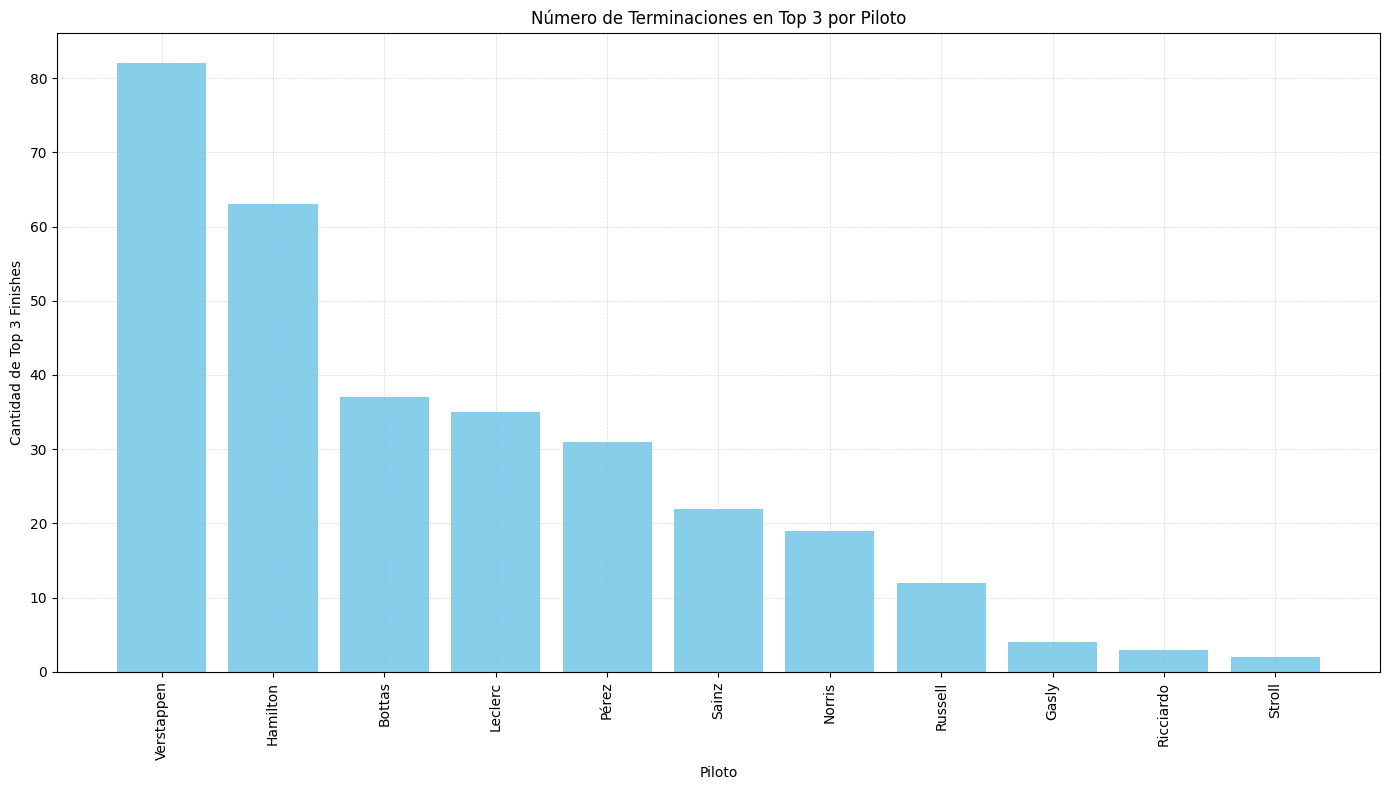

In [24]:
# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(top3_nombres['surname'], top3_nombres['Top3'], color='skyblue')
plt.title('Número de Terminaciones en Top 3 por Piloto')
plt.xlabel('Piloto')
plt.ylabel('Cantidad de Top 3 Finishes')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mejor legibilidad
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

Grafiquemos el número promedio de paradas que realizan los pilotos que han quedado en los 3 primeros puestos

In [25]:
# Filtramos para obtener solo las entradas donde los pilotos terminaron en el Top 3
top3_finishes = df[df['Top3'] == 1]

# Agrupar por driverId y sumar las paradas en esas carreras específicas
top3_stops = top3_finishes.groupby('driverId')['stop'].sum().reset_index()

# Hacer un merge con la información del piloto y los conteos de Top3
top3_totalstops = pd.merge(top3_nombres, top3_stops, on='driverId')

# Calcular el promedio de paradas por carrera en el Top 3
top3_totalstops['avg_stops'] = top3_totalstops['stop'] / top3_totalstops['Top3']

# Ordenar los resultados por el promedio de paradas de menor a mayor
top3_totalstops.sort_values(by='avg_stops', ascending=True, inplace=True)

top3_totalstops.head()

,driverId,surname,Top3,stop,avg_stops
1169,840,Stroll,2,2,1.0
1091,840,Stroll,2,2,1.0
1092,840,Stroll,2,2,1.0
1094,840,Stroll,2,2,1.0
1095,840,Stroll,2,2,1.0


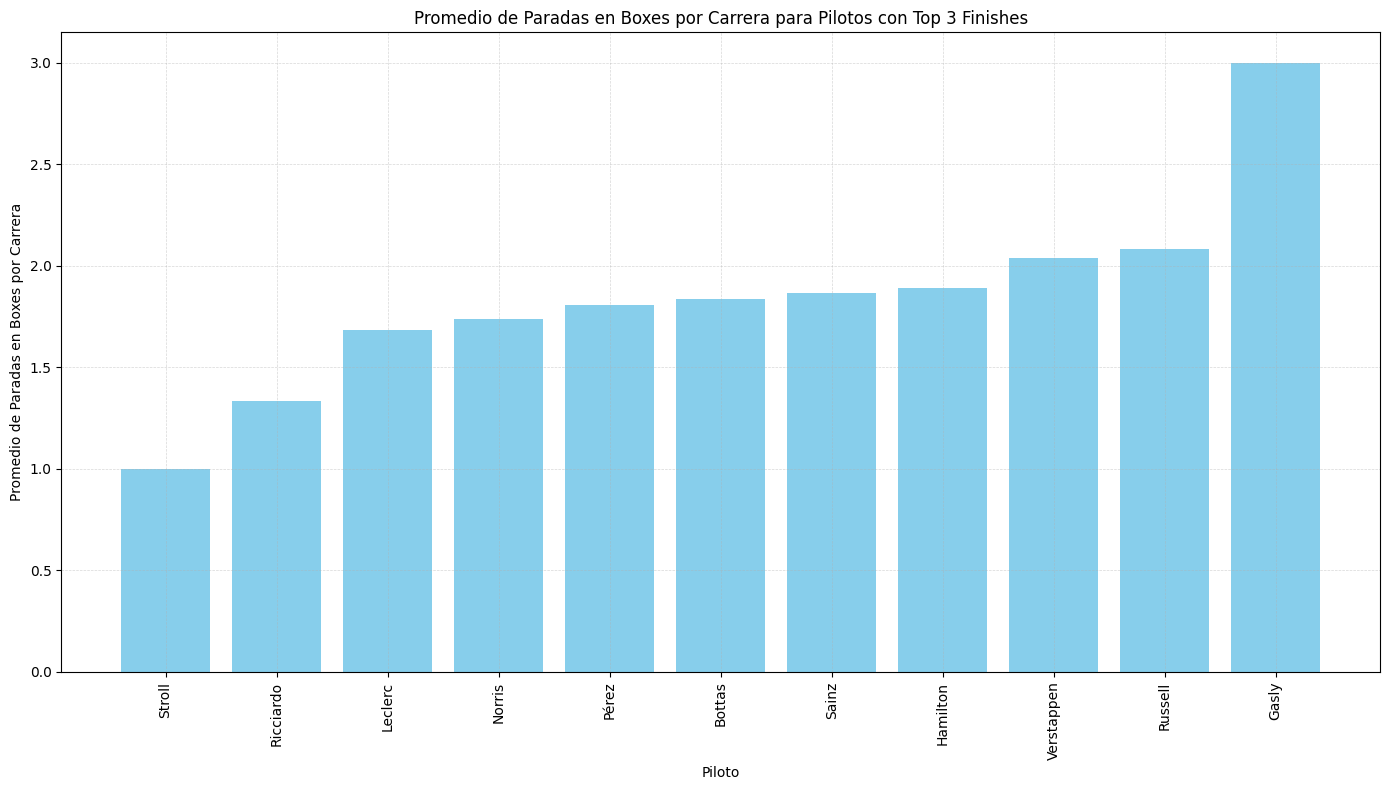

In [26]:
# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(top3_totalstops['surname'], top3_totalstops['avg_stops'], color='skyblue')
plt.title('Promedio de Paradas en Boxes por Carrera para Pilotos con Top 3 Finishes')
plt.xlabel('Piloto')
plt.ylabel('Promedio de Paradas en Boxes por Carrera')
plt.xticks(rotation=90)
plt.grid(True,  which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Añade una cuadrícula para facilitar la lectura
plt.tight_layout()  # Ajusta automáticamente los subplots para que no se superpongan
plt.show()

Grafiquemos el número promedio de paradas que realizan los pilotos que NO han quedado en los 3 primeros puestos

In [27]:
# Filtrar para obtener solo las entradas donde los pilotos NO terminaron en el Top 3
not_top3_finishes = df[df['Top3'] == 0]

# Agrupar por driverId y sumar las paradas en esas carreras específicas
not_top3_stops = not_top3_finishes.groupby('driverId')['stop'].sum().reset_index()

# Contar cuántas veces los pilotos NO terminaron en el Top 3
not_top3_counts = not_top3_finishes.groupby('driverId')['Top3'].count().reset_index()

# Hacer un merge con la información del piloto y los conteos de no Top3
not_top3_nombres = pd.merge(piloto_info, not_top3_counts, on='driverId')

# Hacer un merge con la información del piloto y los conteos de Top3
not_top3_totalstops = pd.merge(not_top3_nombres, not_top3_stops, on='driverId')

# Calcular el promedio de paradas por carrera NO terminada en el Top 3
not_top3_totalstops['not_avg_stops'] = not_top3_totalstops['stop'] / not_top3_totalstops['Top3']

# Ordenar los resultados por el promedio de paradas de menor a mayor
not_top3_totalstops.sort_values(by='not_avg_stops', ascending=True, inplace=True)

# Imprimir los resultados
not_top3_totalstops.head()

,driverId,surname,Top3,stop,not_avg_stops
178,817,Ricciardo,92,159,1.728261
284,817,Ricciardo,92,159,1.728261
135,817,Ricciardo,92,159,1.728261
628,817,Ricciardo,92,159,1.728261
944,817,Ricciardo,92,159,1.728261


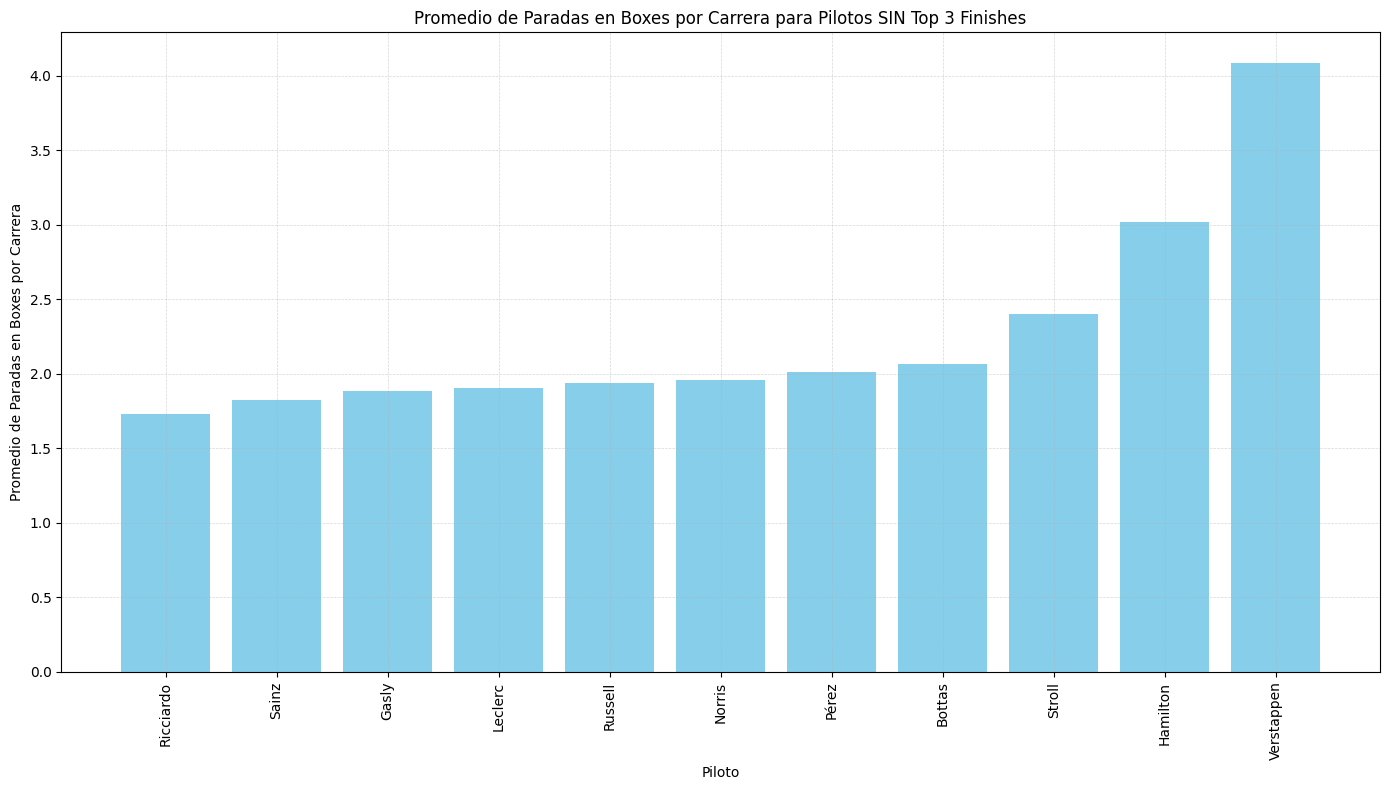

In [28]:
#Creo el grafico de barras
plt.figure(figsize=(14, 8))
plt.bar(not_top3_totalstops['surname'], not_top3_totalstops['not_avg_stops'], color='skyblue')
plt.title('Promedio de Paradas en Boxes por Carrera para Pilotos SIN Top 3 Finishes')
plt.xlabel('Piloto')
plt.ylabel('Promedio de Paradas en Boxes por Carrera')
plt.xticks(rotation=90)
plt.grid(True, which = 'both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

Vamos a calcular el número total de carreras y los 3 primeros resultados de cada piloto en cada año

In [29]:
# Usando 'top3_finishes' para contar las terminaciones en el Top 3 por piloto y año
top3_counts_year = top3_finishes.groupby(['driverId', 'year']).size().reset_index(name='top3_finishes')

top3_counts_year.head()

,driverId,year,top3_finishes
0,1,2019,17
1,1,2020,14
2,1,2021,16
3,1,2022,9
4,1,2023,6


In [30]:
# Agrupar el DataFrame original para contar el total de carreras por piloto y año
total_races = df.groupby(['driverId', 'year']).size().reset_index(name='total_races')

total_races.head()

,driverId,year,total_races
0,1,2019,21
1,1,2020,16
2,1,2021,21
3,1,2022,21
4,1,2023,21


Vamos a calcular el porcentaje de top3 por año de cada piloto

In [31]:
# Hacer un merge para combinar el total de carreras y las terminaciones en el Top 3
top3_summary = pd.merge(total_races, top3_counts_year, on=['driverId', 'year'])

# Completar las filas donde no hay terminaciones en el Top 3 con ceros
top3_summary['top3_finishes'].fillna(0, inplace=True)

# Hacer un merge con la información del piloto
top3_summary = pd.merge(piloto_info, top3_summary, on='driverId')

# Calcular el porcentaje de terminaciones en el Top 3 por piloto y año
top3_summary['top3_percentage'] = (top3_summary['top3_finishes'] / top3_summary['total_races']) * 100

# Ordenar los resultados por la cantidad de top 3 de por año
top3_summary.sort_values(by=['year'], ascending= [True], inplace=True)

top3_summary.head()

<ipython-input-31-5fd10e1cf7f0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top3_summary['top3_finishes'].fillna(0, inplace=True)


,driverId,surname,year,total_races,top3_finishes,top3_percentage
0,822,Bottas,2019,21,15,71.428571
1916,842,Gasly,2019,19,1,5.263158
1920,1,Hamilton,2019,21,17,80.952381
1937,842,Gasly,2019,19,1,5.263158
1941,844,Leclerc,2019,21,10,47.619048


Vamos a agregar estas dos nuevas variables al set de datos para mirar la correlacion que aportan

In [32]:
# Seleccionar solo las columnas nuevas
porcentajes = ['total_races', 'top3_percentage']
porcentajes_add = top3_summary[['driverId', 'year'] + porcentajes]

# Merge con el DataFrame original
df = pd.merge(df, porcentajes_add, on=['driverId', 'year'])

df.head()

,raceId,year,round,driverId,grid,positionOrder,qualifyId,position,lap,surname,...,passed_q3,delta_q2_q1,delta_q3_q2,q1_time_gap,q2_time_gap,q3_time_gap,avg_position_last_races,Top3,total_races,top3_percentage
0,1010,2019,1,822,2,1,7961,2,1,Bottas,...,1,-1.174,-0.595,0.35,0.179,0.112,4.2,1,21,71.428571
1,1010,2019,1,822,2,1,7961,2,1,Bottas,...,1,-1.174,-0.595,0.35,0.179,0.112,4.2,1,21,71.428571
2,1010,2019,1,822,2,1,7961,2,1,Bottas,...,1,-1.174,-0.595,0.35,0.179,0.112,4.2,1,21,71.428571
3,1010,2019,1,822,2,1,7961,2,1,Bottas,...,1,-1.174,-0.595,0.35,0.179,0.112,4.2,1,21,71.428571
4,1010,2019,1,822,2,1,7961,2,1,Bottas,...,1,-1.174,-0.595,0.35,0.179,0.112,4.2,1,21,71.428571


Ahora miremos la matriz de correlacion de las variables

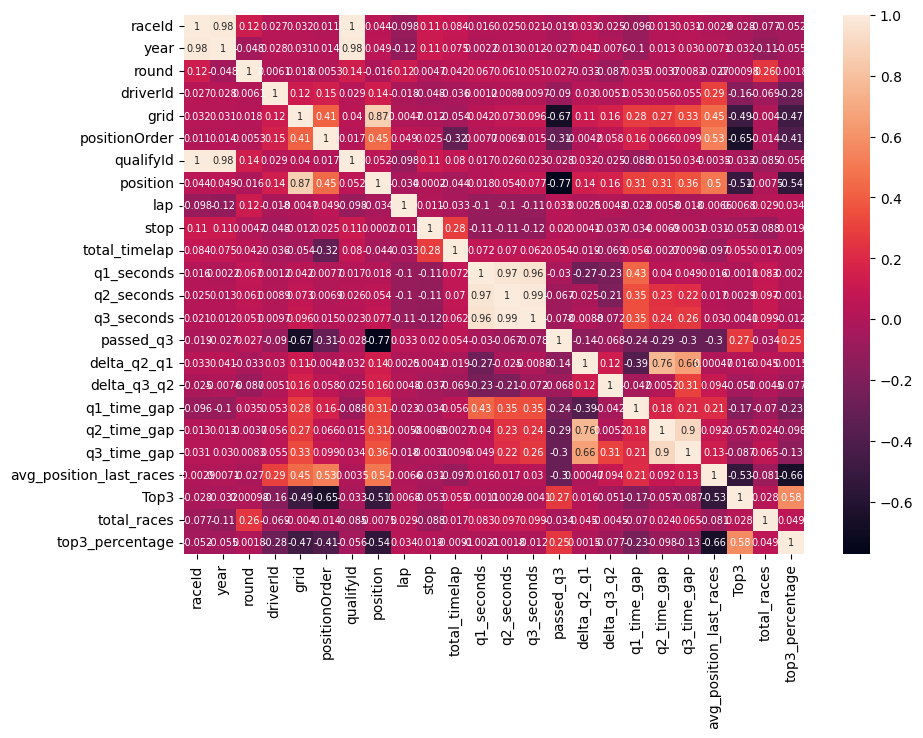

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, mask = False, annot_kws={"size": 7})
plt.show()

Vamos a calcular correlaciones con el Top3

In [34]:
# Calcular la matriz de correlación
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()['Top3'].sort_values(ascending=False)
print(correlation_matrix)

Top3                       1.000000
top3_percentage            0.576456
passed_q3                  0.273883
total_timelap              0.055036
total_races                0.028460
delta_q2_q1                0.015873
lap                        0.006763
q2_seconds                 0.002911
round                      0.000976
q1_seconds                -0.001059
q3_seconds                -0.004110
raceId                    -0.028460
year                      -0.031725
qualifyId                 -0.033304
delta_q3_q2               -0.051262
stop                      -0.053315
q2_time_gap               -0.056612
q3_time_gap               -0.086630
driverId                  -0.162367
q1_time_gap               -0.173106
grid                      -0.488443
position                  -0.511051
avg_position_last_races   -0.533544
positionOrder             -0.652157
Name: Top3, dtype: float64


In [35]:
df2 = df.drop([ 'raceId', 'round', 'qualifyId', 'lap', 'surname','positionOrder'],axis = 1)
print(df2.columns)

print(df2)

Index(['year', 'driverId', 'grid', 'position', 'stop', 'total_timelap',
       'q1_seconds', 'q2_seconds', 'q3_seconds', 'passed_q3', 'delta_q2_q1',
       'delta_q3_q2', 'q1_time_gap', 'q2_time_gap', 'q3_time_gap',
       'avg_position_last_races', 'Top3', 'total_races', 'top3_percentage'],
      dtype='object')
       year  driverId  grid  position  stop  total_timelap  q1_seconds  \
0      2019       822     2         2     1       5127.325      82.367   
1      2019       822     2         2     1       5127.325      82.367   
2      2019       822     2         2     1       5127.325      82.367   
3      2019       822     2         2     1       5127.325      82.367   
4      2019       822     2         2     1       5127.325      82.367   
...     ...       ...   ...       ...   ...            ...         ...   
87758  2024       846     2         2     2       4591.054      65.450   
87759  2024       846     2         2     2       4591.054      65.450   
87760  2024       8

Este es el df que se va a usar para la prediccion de la posicion exacta de top 3. Vamos a eliminar las variables que no aportan informacion relevante y dejamos positionOrder



In [36]:
df = df.drop(['raceId', 'round', 'qualifyId', 'lap', 'surname'],axis = 1)

print(df)

       year  driverId  grid  positionOrder  position  stop  total_timelap  \
0      2019       822     2              1         2     1       5127.325   
1      2019       822     2              1         2     1       5127.325   
2      2019       822     2              1         2     1       5127.325   
3      2019       822     2              1         2     1       5127.325   
4      2019       822     2              1         2     1       5127.325   
...     ...       ...   ...            ...       ...   ...            ...   
87758  2024       846     2             20         2     2       4591.054   
87759  2024       846     2             20         2     2       4591.054   
87760  2024       846     2             20         2     2       4591.054   
87761  2024       846     2             20         2     2       4591.054   
87762  2024       846     2             20         2     2       4591.054   

       q1_seconds  q2_seconds  q3_seconds  passed_q3  delta_q2_q1  \
0     

Vemos la distribución de las clases para ver si es un dataset balanceado

In [37]:
class_distribution = df2['Top3'].value_counts(normalize=True)  # normalize=True para obtener proporciones
print(class_distribution)


# Filtrar solo las filas donde positionOrder esté en el Top 3
top3_positions = df[df['positionOrder'].isin([1, 2, 3])]

# Calcular la distribución normalizada para el Top 3
class_distribution2 = top3_positions['positionOrder'].value_counts(normalize=True)
print(class_distribution2)

Top3
0    0.620011
1    0.379989
Name: proportion, dtype: float64
positionOrder
1    0.359831
2    0.324058
3    0.316111
Name: proportion, dtype: float64


GRU para predecir si esta en el top 3 o no

In [39]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import numpy as np

# Preprocesamiento de datos
window_size = 5  # Tamaño de la ventana temporal
X, y = [], []

# Crear secuencias temporales
for driver_id in df['driverId'].unique():
    piloto_data = df2[df2['driverId'] == driver_id]
    for i in range(len(piloto_data) - window_size):
        X.append(piloto_data.iloc[i:i + window_size, :-1].values)
        y.append(piloto_data.iloc[i + window_size]['Top3'])

X = np.array(X)
y = np.array(y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])
X_test_reshaped = X_test.reshape(-1, X_test.shape[2])

X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test.shape)

# Submuestreo de la clase mayoritaria
train_data = np.concatenate([X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train.reshape(-1, 1)], axis=1)
train_data_0 = train_data[train_data[:, -1] == 0]  # Clase mayoritaria (no Top 3)
train_data_1 = train_data[train_data[:, -1] == 1]  # Clase minoritaria (Top 3)

# Igualar las clases por submuestreo
train_data_0_downsampled = resample(
    train_data_0,
    replace=False,
    n_samples=len(train_data_1),
    random_state=42
)

# Combinar las clases balanceadas
train_data_balanced = np.vstack((train_data_0_downsampled, train_data_1))
np.random.shuffle(train_data_balanced)

# Separar características y etiquetas
X_train_balanced = train_data_balanced[:, :-1].reshape(-1, X_train_scaled.shape[1], X_train_scaled.shape[2])
y_train_balanced = train_data_balanced[:, -1]

# Calcular class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Definir la función para construir el modelo
def build_model(hp):
    model = Sequential()
    model.add(GRU(
        units=hp.Choice('units_1', [32, 64, 128]),
        input_shape=(X_train_balanced.shape[1], X_train_balanced.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(hp.Choice('dropout_1', [0.1, 0.2, 0.3])))
    model.add(GRU(
        units=hp.Choice('units_2', [16, 32, 64])
    ))
    model.add(Dropout(hp.Choice('dropout_2', [0.1, 0.2, 0.3])))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Configurar el Grid Search con KerasTuner
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='gru_tuning',
    project_name='gru_hyperparameter_tuning'
)

# Realizar la búsqueda
tuner.search(X_train_balanced, y_train_balanced, epochs=20, validation_split=0.2)

# Mostrar los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores hiperparámetros encontrados:\n"
      f"Unidades en la primera capa GRU: {best_hps.get('units_1')}\n"
      f"Dropout en la primera capa: {best_hps.get('dropout_1')}\n"
      f"Unidades en la segunda capa GRU: {best_hps.get('units_2')}\n"
      f"Dropout en la segunda capa: {best_hps.get('dropout_2')}\n"
      f"Learning rate: {best_hps.get('learning_rate')}")

# Entrenar el modelo con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_balanced, y_train_balanced,
    epochs=50, batch_size=32, validation_split=0.2,
    class_weight=class_weights
)

# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test - Loss: {test_loss:.4f}, Test - Accuracy: {test_accuracy:.4f}")

# Predecir en el conjunto de prueba
y_pred_prob = best_model.predict(X_test_scaled)

# Asegurar que y_pred_prob sea unidimensional
if y_pred_prob.ndim > 1:
    y_pred_prob = y_pred_prob.flatten()

print(f"Dimensión de y_pred_prob: {y_pred_prob.shape}")

# Generar predicciones binarias
y_pred = (y_pred_prob > 0.5).astype(int)
print(f"Dimensión de y_pred: {y_pred.shape}")

# Verificar dimensiones
assert len(y_test) == len(y_pred), "Las dimensiones de y_test y y_pred no coinciden."

# Generar el classification report
print(classification_report(y_test, y_pred))

# Métricas adicionales
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test - Accuracy: {accuracy:.4f}")
print(f"Test - F1 Score: {f1:.4f}")
print(f"Test - ROC AUC: {roc_auc:.4f}")

Trial 1 Complete [00h 05m 33s]
val_accuracy: 0.9963434934616089

Best val_accuracy So Far: 0.9963434934616089
Total elapsed time: 00h 05m 33s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
32                |32                |units_1
0.1               |0.1               |dropout_1
16                |16                |units_2
0.1               |0.1               |dropout_2
0.001             |0.01              |learning_rate

Epoch 1/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9631 - loss: 0.1094 - val_accuracy: 0.9963 - val_loss: 0.0265
Epoch 2/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9967 - loss: 0.0219 - val_accuracy: 0.9963 - val_loss: 0.0245
Epoch 3/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9966 - loss: 0.0229 - val_accuracy: 0.9963 - val_loss: 0.0252
Epoch 4/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9970 - loss: 0.0207 - val_accuracy: 0.9963 - val_loss: 0.0243
Epoch 5/20


GRU para ver en que posicion del top 3 esta

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Definir tamaño de ventana
window_size = 5

# Filtrar solo pilotos que estuvieron en el Top 3
df_top3 = df[df['Top3'] == 1]

# Crear secuencias temporales para clasificar posición
X_pos, y_pos = [], []

for driver_id in df_top3['driverId'].unique():
    piloto_data = df_top3[df_top3['driverId'] == driver_id]
    for i in range(len(piloto_data) - window_size):
        X_pos.append(piloto_data.iloc[i:i + window_size, :-2].values)  # Excluyendo 'Top3' y 'Position'
        y_pos.append(piloto_data.iloc[i + window_size]['positionOrder'])

X_pos = np.array(X_pos)
y_pos = np.array(y_pos)

# Dividir datos en entrenamiento y prueba
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42, stratify=y_pos)

# Escalar características
scaler_top3 = StandardScaler()
X_train_pos_reshaped = X_train_pos.reshape(-1, X_train_pos.shape[2])
X_test_pos_reshaped = X_test_pos.reshape(-1, X_test_pos.shape[2])

X_train_pos_scaled = scaler_top3.fit_transform(X_train_pos_reshaped).reshape(X_train_pos.shape)
X_test_pos_scaled = scaler_top3.transform(X_test_pos_reshaped).reshape(X_test_pos.shape)

# Sobremuestreo de clases minoritarias
train_data = np.concatenate([X_train_pos_scaled.reshape(X_train_pos_scaled.shape[0], -1), y_train_pos.reshape(-1, 1)], axis=1)
train_data_df = pd.DataFrame(train_data, columns=[f'feature_{i}' for i in range(train_data.shape[1] - 1)] + ['position'])

# Separar por clase
balanced_dfs = []
class_counts = train_data_df['position'].value_counts()
majority_class = class_counts.idxmax()
for cls in class_counts.index:
    if cls != majority_class:
        # Sobremuestreo de clases minoritarias
        resampled = resample(
            train_data_df[train_data_df['position'] == cls],
            replace=True,
            n_samples=class_counts[majority_class],
            random_state=42
        )
        balanced_dfs.append(resampled)
    else:
        balanced_dfs.append(train_data_df[train_data_df['position'] == cls])

balanced_df = pd.concat(balanced_dfs)
np.random.shuffle(balanced_df.values)

# Reconstruir X e y balanceados
X_train_pos_balanced = balanced_df.iloc[:, :-1].values.reshape(-1, X_train_pos_scaled.shape[1], X_train_pos_scaled.shape[2])
y_train_pos_balanced = balanced_df['position'].values
y_train_pos_onehot_balanced = to_categorical(y_train_pos_balanced - 1, num_classes=3)

# Convertir etiquetas de prueba a one-hot encoding
y_test_pos_onehot = to_categorical(y_test_pos - 1, num_classes=3)

# Definir la función para construir el modelo
def build_model(hp):
    model_pos = Sequential()
    model_pos.add(GRU(
        units=hp.Choice('units_1', [32, 64, 128]),
        input_shape=(X_train_pos_balanced.shape[1], X_train_pos_balanced.shape[2]),
        return_sequences=True
    ))
    model_pos.add(Dropout(hp.Choice('dropout_1', [0.1, 0.2, 0.3])))
    model_pos.add(GRU(
        units=hp.Choice('units_2', [16, 32, 64]),
    ))
    model_pos.add(Dropout(hp.Choice('dropout_2', [0.1, 0.2, 0.3])))
    model_pos.add(Dense(3, activation='softmax'))

    model_pos.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model_pos

# Configurar el Grid Search con KerasTuner
tuner_pos = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='gru_tuning',
    project_name='gru_hyperparameter_tuning_position'
)

# Realizar la búsqueda
tuner_pos.search(X_train_pos_balanced, y_train_pos_onehot_balanced, epochs=20, validation_split=0.2)

# Mostrar los mejores hiperparámetros
best_hps_pos = tuner_pos.get_best_hyperparameters(num_trials=1)[0]

# Entrenar el modelo con los mejores hiperparámetros
best_model_pos = tuner_pos.hypermodel.build(best_hps_pos)
history = best_model_pos.fit(
    X_train_pos_balanced, y_train_pos_onehot_balanced,
    epochs=50, batch_size=32, validation_split=0.2
)

# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = best_model_pos.evaluate(X_test_pos_scaled, y_test_pos_onehot)
print(f"Test - Loss: {test_loss:.4f}, Test - Accuracy: {test_accuracy:.4f}")

# Predecir en el conjunto de prueba
y_pred_prob = best_model_pos.predict(X_test_pos_scaled)
y_pred = np.argmax(y_pred_prob, axis=1) + 1  # Convertir la predicción a las posiciones 1, 2, 3

# Calcular métricas globales
accuracy = accuracy_score(y_test_pos, y_pred)
f1 = f1_score(y_test_pos, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_pos_onehot, y_pred_prob, multi_class='ovr')

print(f"Test - Accuracy: {accuracy:.4f}")
print(f"Test - F1 Score: {f1:.4f}")
print(f"Test - ROC AUC: {roc_auc:.4f}")


Ingresar caracteristicas de usuario

In [ ]:
def predecir_top3_y_posicion_gru(
    apellido_piloto, df_pilotos, df_datos, modelo_gru, scaler, top3_model_gru, scaler_top3, window_size=1
):
    # Validar el piloto
    piloto = df_pilotos[df_pilotos['surname'] == apellido_piloto]
    if piloto.empty:
        return f"Error: El piloto '{apellido_piloto}' no está en la lista permitida."

    driver_id = piloto['driverId'].iloc[0]
    print(f"\nValidación exitosa: El piloto '{apellido_piloto}' (ID: {driver_id}) está en la lista permitida.")

    # Obtener las columnas relevantes
    columnas_entrada = df_datos.drop(columns=['Top3']).columns

    # Solicitar las características secuenciales al usuario
    print("\nIngrese los valores para las características (secuencia de tamaño 1):")
    valores_usuario = []
    for i in range(window_size):
        paso = []
        print(f"\nPaso temporal {i + 1}:")
        for col in columnas_entrada:
            valor = float(input(f"Ingrese el valor para {col}: "))
            paso.append(valor)
        valores_usuario.append(paso)

    # Convertir a numpy array y escalar
    valores_usuario = np.array(valores_usuario)
    valores_usuario_scaled = scaler.transform(valores_usuario.reshape(-1, valores_usuario.shape[1])).reshape(
        1, window_size, -1
    )

    # Predicción con el modelo principal (Top 3 o no)
    prediccion_top3 = modelo_gru.predict(valores_usuario_scaled).flatten()[0]
    print(f"Probabilidad de estar en el Top 3: {prediccion_top3:.2%}")

    if prediccion_top3 > 0.5:
        # Si está en el Top 3, predecir la posición específica
        valores_usuario_top3_scaled = scaler_top3.transform(valores_usuario.reshape(-1, valores_usuario.shape[1])).reshape(
            1, window_size, -1
        )
        posicion_prob = top3_model_gru.predict(valores_usuario_top3_scaled)
        posicion = np.argmax(posicion_prob, axis=1)[0] + 1

        return (
            f"\n¿El piloto '{apellido_piloto}' terminará en el Top 3? Sí\n"
            f"Probabilidad de Sí: {prediccion_top3:.2%}\n"
            f"Posición en el Top 3: {posicion}"
        )
    else:
        return (
            f"\n¿El piloto '{apellido_piloto}' terminará en el Top 3? No\n"
            f"Probabilidad de Sí: {prediccion_top3:.2%}"
        )

# Pedir al usuario ingresar el apellido del piloto
apellido_usuario = input("Ingresa el apellido del piloto: ")

# Realizar la predicción de Top 3 y posición
resultado = predecir_top3_y_posicion_gru(
    apellido_usuario, pilotos, df2, best_model, scaler, best_model_pos, scaler_top3, window_size=1
)
print(resultado)